<a href="https://colab.research.google.com/github/seymadogru/BasicDataTypes/blob/master/ResNet152V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [3]:
inputBasePath = "/content/drive/MyDrive/CDD-CESM-MM"
outputBasePath = "/content/drive/MyDrive/imagearray"

In [4]:
image_width = 224
image_height = 224

In [5]:
classes = ['Benign','Malignant','Normal']

In [6]:
os.chdir(inputBasePath)

In [7]:
X = []
Y = []

In [8]:
i = 0
for class1 in classes:
  os.chdir(class1)
  print('=> '+class1)
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width,image_height))
    X.append(img)
    Y.append(class1)
    i = i + 1
  os.chdir('..')

=> Benign
=> Malignant
=> Normal


In [9]:
print("X : ",len(X))
print("Y : ",len(Y))

X :  2006
Y :  2006


In [15]:
X = np.array(X).reshape(-1,image_width,image_height,3)

Y = np.array(Y)

print("X : ",X.shape)
print("Y : ",Y.shape)

print("X : ",len(X))
print("Y : ",len(Y))

X :  (2006, 224, 224, 3)
Y :  (2006,)
X :  2006
Y :  2006


In [17]:
os.chdir('..')

In [18]:
os.chdir("imagearrays")

In [19]:
np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

print("[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED \n ")

[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED 
 


In [20]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [21]:
from tensorflow.keras import utils
utils.to_categorical

<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [22]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [51]:
data = np.load('/content/drive/MyDrive/imagearrays/224x224_images.npy')
labels = np.load('/content/drive/MyDrive/imagearrays/224x224_labels.npy')
data.shape

(2006, 224, 224, 3)

In [52]:
labels

array(['Benign', 'Benign', 'Benign', ..., 'Normal', 'Normal', 'Normal'],
      dtype='<U9')

In [53]:
labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [54]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [55]:
data =  data.reshape(-1,image_width , image_height , 3)

In [56]:
data.shape

(2006, 224, 224, 3)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .20, shuffle = True)

In [58]:
print(
"""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}

""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (1604, 224, 224, 3)
x_test shape: (402, 224, 224, 3)
y_train shape: (1604, 3)
y_test shape: (402, 3)




In [59]:
print(x_train.shape)
print(x_validate.shape)
print(y_train.shape)
print(y_validate.shape)

(1604, 224, 224, 3)
(161, 224, 224, 3)
(1604, 3)
(161, 3)


In [60]:
x_train=x_train / 255.0
x_test=x_test / 255.0

In [61]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .10, shuffle = True,random_state=42)

In [62]:
print(
"""
x_train shape: {}
x_test shape: {}

""".format(x_train.shape, x_test.shape))


x_train shape: (1443, 224, 224, 3)
x_test shape: (402, 224, 224, 3)




In [63]:
print(y_train.shape)
print(y_validate.shape)

(1443, 3)
(161, 3)


In [64]:
#ImageDataGenerator ile veri arttırım modelini kurgula ve datagen değikenine ata
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0.5,
        zoom_range = 0.5, # Randomly zoom image %10
        width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width) %5
        height_shift_range=0.5,  # randomly shift images vertically (fraction of total height) %5
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False  # randomly flip images
                        )
datagen.fit(x_train) #datagen'i x_train üzerinden çalıştır ve veri üret

In [65]:
x_train.shape

(1443, 224, 224, 3)

In [67]:
pip install keras

In [68]:
import keras

In [70]:
modelResNet152V2 = keras.applications.ResNet152V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(image_width ,image_height ,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

In [71]:
NUM_CLASSES=3
model = Sequential()
model.add(modelResNet152V2)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='softmax'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [72]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [73]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1,  factor=0.5, min_lr=0.00001)

In [74]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [75]:
epc = 100
bs = 32

In [76]:
history = model.fit_generator(datagen.flow(np.array(x_train),np.array(y_train), batch_size=bs),
                              epochs = epc, validation_data = datagen.flow(np.array(x_validate),
                             np.array(y_validate),batch_size=bs),verbose = 1,
                              steps_per_epoch=x_train.shape[0] // bs,
                              callbacks=[learning_rate_reduction])

<ipython-input-76-3e48a0840e29>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(np.array(x_train),np.array(y_train), batch_size=bs),


Epoch 1/100
45/45 [==============================] - 72s 985ms/step - loss: 1.0985 - accuracy: 0.3536 - val_loss: 1.0987 - val_accuracy: 0.3540 - lr: 1.0000e-04
Epoch 2/100
45/45 [==============================] - 39s 862ms/step - loss: 1.0982 - accuracy: 0.3756 - val_loss: 1.0984 - val_accuracy: 0.3540 - lr: 1.0000e-04
Epoch 3/100
45/45 [==============================] - 38s 829ms/step - loss: 1.0979 - accuracy: 0.3756 - val_loss: 1.0980 - val_accuracy: 0.3540 - lr: 1.0000e-04
Epoch 4/100
45/45 [==============================] - ETA: 0s - loss: 1.0976 - accuracy: 0.3777
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
45/45 [==============================] - 38s 847ms/step - loss: 1.0976 - accuracy: 0.3777 - val_loss: 1.0978 - val_accuracy: 0.3540 - lr: 1.0000e-04
Epoch 5/100
45/45 [==============================] - 38s 846ms/step - loss: 1.0974 - accuracy: 0.3756 - val_loss: 1.0976 - val_accuracy: 0.3540 - lr: 5.0000e-05
Epoch 6/100
45/45 [=================

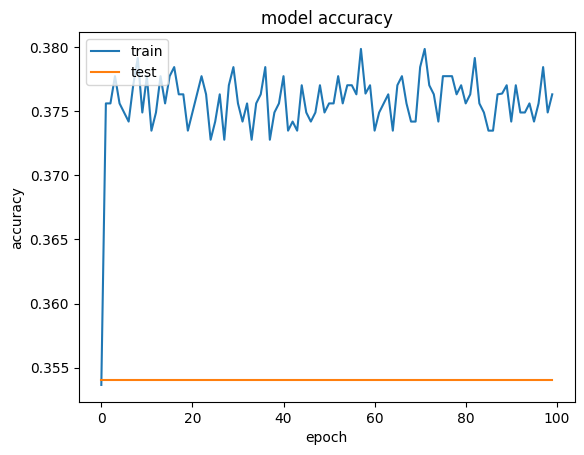

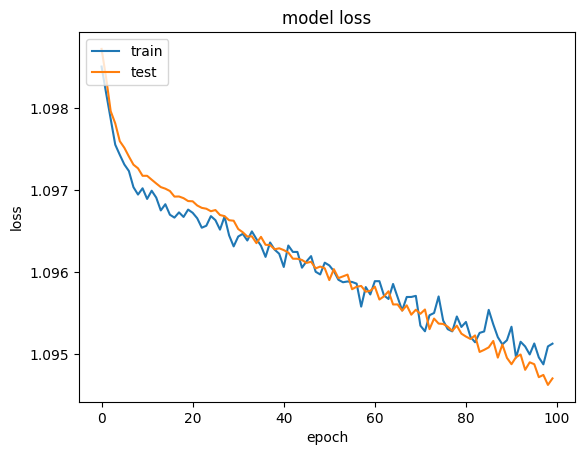

In [77]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

13/13 [==============================] - 8s 403ms/step


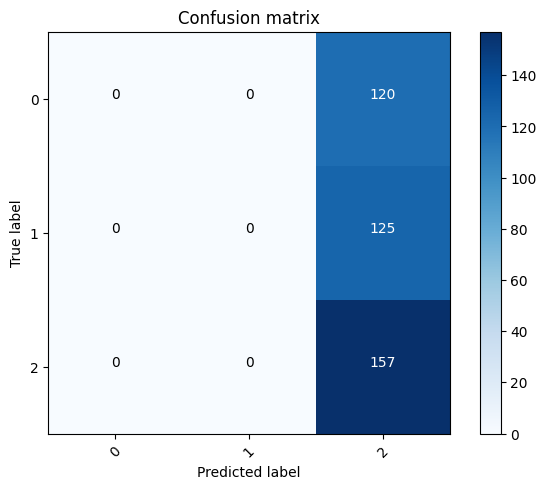

In [79]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)  #test süreci için Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [80]:
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00       125
           2       0.39      1.00      0.56       157

    accuracy                           0.39       402
   macro avg       0.13      0.33      0.19       402
weighted avg       0.15      0.39      0.22       402



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
